In [1]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
import geopandas as gpd

# Load charging station data
file_path = r'C:\Users\Admin\OneDrive\EVCFLO\Branches\Shilpa-Sharma\export.geojson'
charging_stations = gpd.read_file(file_path)

# Convert to CSV
csv_file_path = r'C:\Users\Admin\OneDrive\EVCFLO\Branches\Shilpa-Sharma\export.csv'
charging_stations.to_csv(csv_file_path, index=False)

In [3]:
import pandas as pd

#load the csv file into a dataframe
csv_file_path =  r'C:\Users\Admin\OneDrive\EVCFLO\Branches\Shilpa-Sharma\export.csv'
charging_stations_df = pd.read_csv(csv_file_path)

# Print all columns
print(charging_stations_df.columns)

Index(['id', '@id', 'amenity', 'area', 'brand', 'brand:wikidata',
       'description', 'opening_hours', 'short_name',
       'socket:tesla_supercharger',
       ...
       'ele', 'payment:cards', 'payment:membership_card', 'payment:qr_code',
       'not:operator:wikidata', 'socket:unknown', 'payment:apple_pay',
       'man_made', 'socket:ccs:output', 'geometry'],
      dtype='object', length=132)


In [4]:
# Check data types of columns
print(charging_stations_df.dtypes)

id                    object
@id                   object
amenity               object
area                  object
brand                 object
                      ...   
socket:unknown       float64
payment:apple_pay     object
man_made              object
socket:ccs:output     object
geometry              object
Length: 132, dtype: object


In [5]:
# Check for null values in each column
print(charging_stations_df.isnull().sum())

id                     0
@id                    0
amenity                0
area                 858
brand                586
                    ... 
socket:unknown       857
payment:apple_pay    858
man_made             858
socket:ccs:output    858
geometry               0
Length: 132, dtype: int64


In [6]:
# Load the dataset
file_path = r'C:\Users\Admin\OneDrive\EVCFLO\Branches\Shilpa-Sharma\export.csv'
charging_stations_df = pd.read_csv(file_path)

# Define the relevant columns for filtering
relevant_columns = ['amenity', 'operator', 'geometry', 'capacity', 
                    'addr:city', 'addr:housenumber', 'addr:street',
                    'location', 'brand', 'socket:tesla_supercharger', 
                    'socket:chademo', 'socket:type2_combo', 'socket:type2']

# Filter the DataFrame to keep only relevant columns
filtered_df = charging_stations_df[relevant_columns].copy()  # Make a copy to avoid warnings

# Create a new column 'socket_type' and fill it based on available socket types
filtered_df['socket_type'] = 'Unknown'
filtered_df.loc[filtered_df['socket:tesla_supercharger'].notna(), 'socket_type'] = 'Tesla Supercharger'
filtered_df.loc[filtered_df['socket:chademo'].notna(), 'socket_type'] = 'CHAdeMO'
filtered_df.loc[filtered_df['socket:type2_combo'].notna(), 'socket_type'] = 'Type 2 Combo'
filtered_df.loc[filtered_df['socket:type2'].notna(), 'socket_type'] = 'Type 2'

# Drop the individual socket type columns
filtered_df.drop(columns=['socket:tesla_supercharger', 'socket:chademo', 
                          'socket:type2_combo', 'socket:type2'], inplace=True)

# Handle missing values
# Impute missing values for 'capacity' with the mean
filtered_df['capacity'] = pd.to_numeric(filtered_df['capacity'], errors='coerce')
filtered_df['capacity'].fillna(filtered_df['capacity'].mean(), inplace=True)

# Drop rows with missing values in critical columns like 'amenity' and 'geometry'
filtered_df.dropna(subset=['amenity', 'geometry'], inplace=True)

# Save the filtered DataFrame to a new CSV file
filtered_csv_path = r'C:\Users\Admin\OneDrive\EVCFLO\Branches\Shilpa-Sharma\filtered_charging_stations.csv'
filtered_df.to_csv(filtered_csv_path, index=False)

# Display the first few rows of the filtered DataFrame
print(filtered_df.head())

            amenity        operator  \
0  charging_station             NaN   
1  charging_station     Tesla, Inc.   
2  charging_station             NaN   
3  charging_station  Darwin Airport   
4  charging_station             NaN   

                                            geometry  capacity addr:city  \
0  POLYGON ((150.8323303 -32.4473776, 150.8322847...  5.288251       NaN   
1  POLYGON ((139.5011723 -35.3040185, 139.5012011...  6.000000       NaN   
2  POLYGON ((138.5748466 -35.0081462, 138.5748542...  5.288251       NaN   
3  POLYGON ((130.877993 -12.4074783, 130.8779695 ...  3.000000       NaN   
4  POLYGON ((144.9937152 -37.8037876, 144.9937602...  5.288251       NaN   

  addr:housenumber addr:street location               brand  \
0              NaN         NaN      NaN         Tesla, Inc.   
1              NaN         NaN      NaN  Tesla Supercharger   
2              NaN         NaN      NaN                 NaN   
3              NaN         NaN      NaN   Tesla Destinat

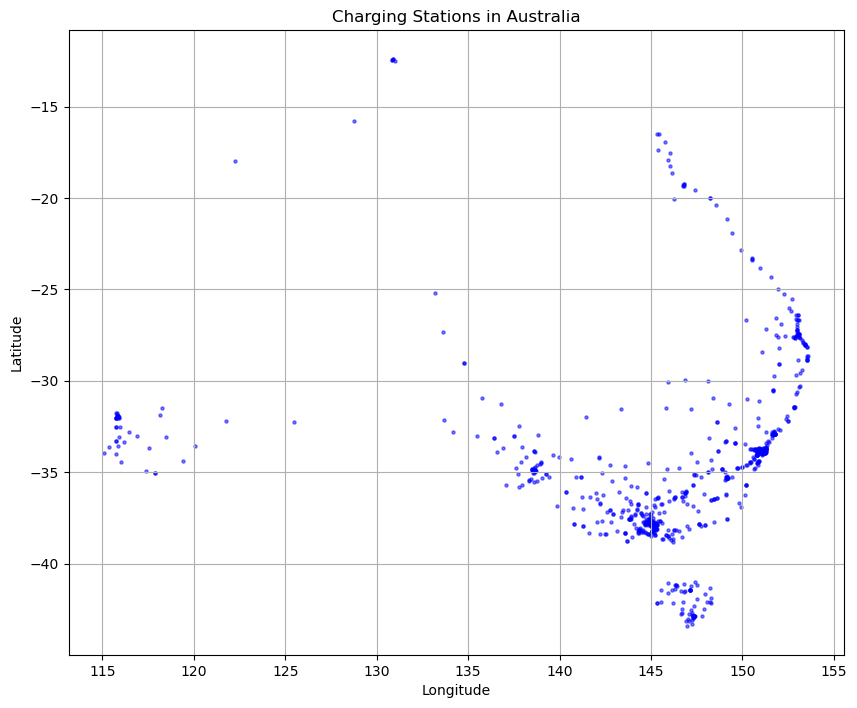

In [22]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt

# Convert 'geometry' column to shapely geometries
charging_stations_df['geometry'] = charging_stations_df['geometry'].apply(wkt.loads)

# Create GeoDataFrame
filtered_gdf = gpd.GeoDataFrame(charging_stations_df, geometry='geometry')

# Plot the charging stations
fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, markersize=5, color='blue', alpha=0.5)
plt.title('Charging Stations in Australia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [23]:
# Summary Statistics
charger_type_counts = filtered_df['socket_type'].value_counts()
average_capacity = filtered_df['capacity'].mean()

print("Charger Type Counts:")
print(charger_type_counts)
print("\nAverage Capacity:", average_capacity)


Charger Type Counts:
Unknown               439
Type 2 Combo          240
Type 2                108
Tesla Supercharger     66
CHAdeMO                 6
Name: socket_type, dtype: int64

Average Capacity: 5.288250652741546


In [24]:
# Calculate summary statistics for charger types
charger_type_summary = filtered_df['socket_type'].value_counts()
charger_type_percentage = filtered_df['socket_type'].value_counts(normalize=True) * 100

# Combine counts and percentages into a DataFrame
charger_type_stats = pd.DataFrame({'Count': charger_type_summary, 'Percentage': charger_type_percentage})

# Print summary statistics for charger types
print("Summary Statistics for Charger Types:")
print(charger_type_stats)


Summary Statistics for Charger Types:
                    Count  Percentage
Unknown               439   51.105937
Type 2 Combo          240   27.939464
Type 2                108   12.572759
Tesla Supercharger     66    7.683353
CHAdeMO                 6    0.698487


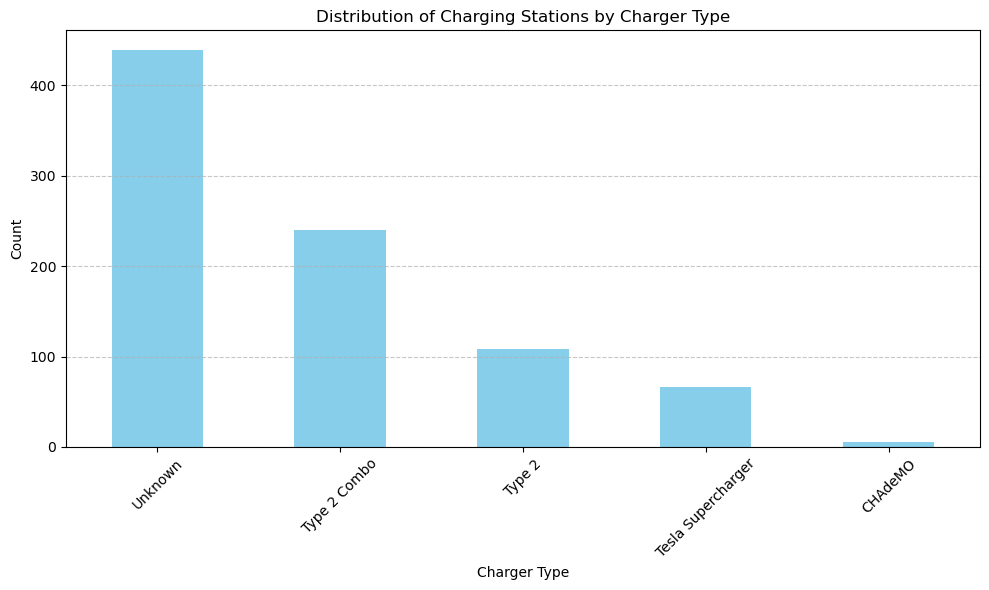

In [25]:

# Plot the distribution of charging stations based on charger types
plt.figure(figsize=(10, 6))
charger_type_stats['Count'].plot(kind='bar', color='skyblue')
plt.title('Distribution of Charging Stations by Charger Type')
plt.xlabel('Charger Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


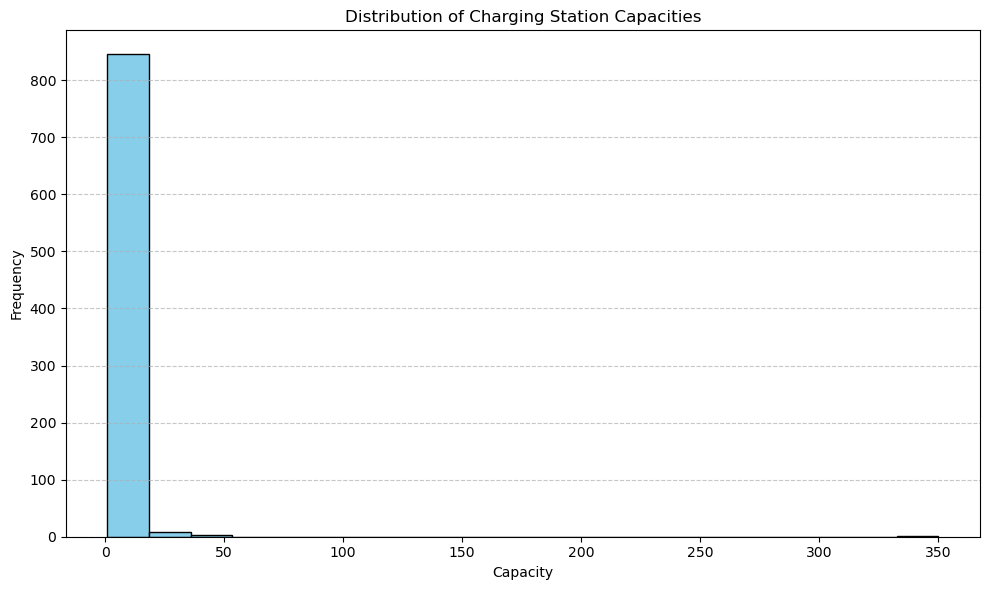

In [26]:
# Plot the distribution of charging station capacities
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['capacity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Charging Station Capacities')
plt.xlabel('Capacity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


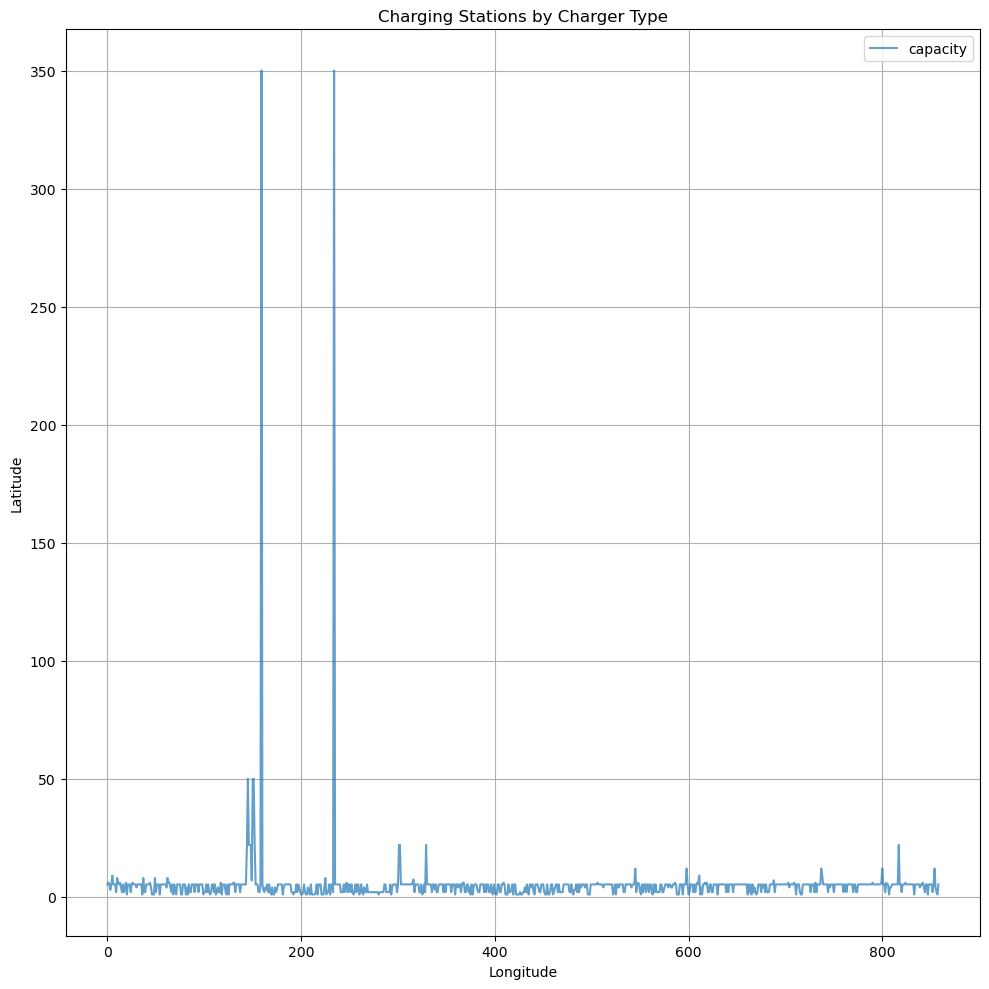

In [27]:
# Plot the charging stations colored by charger type
fig, ax = plt.subplots(figsize=(10, 10))
filtered_df.plot(ax=ax, column='socket_type', legend=True, markersize=50, alpha=0.7)
plt.title('Charging Stations by Charger Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

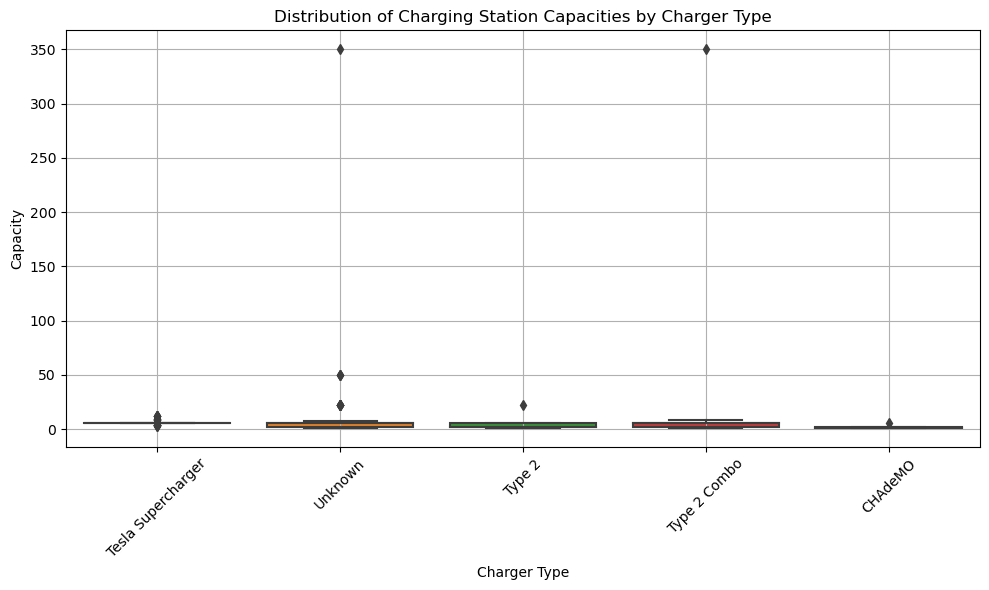

In [28]:
import seaborn as sns

# Create a box plot of capacity by charger type
plt.figure(figsize=(10, 6))
sns.boxplot(x='socket_type', y='capacity', data=filtered_df)
plt.title('Distribution of Charging Station Capacities by Charger Type')
plt.xlabel('Charger Type')
plt.ylabel('Capacity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


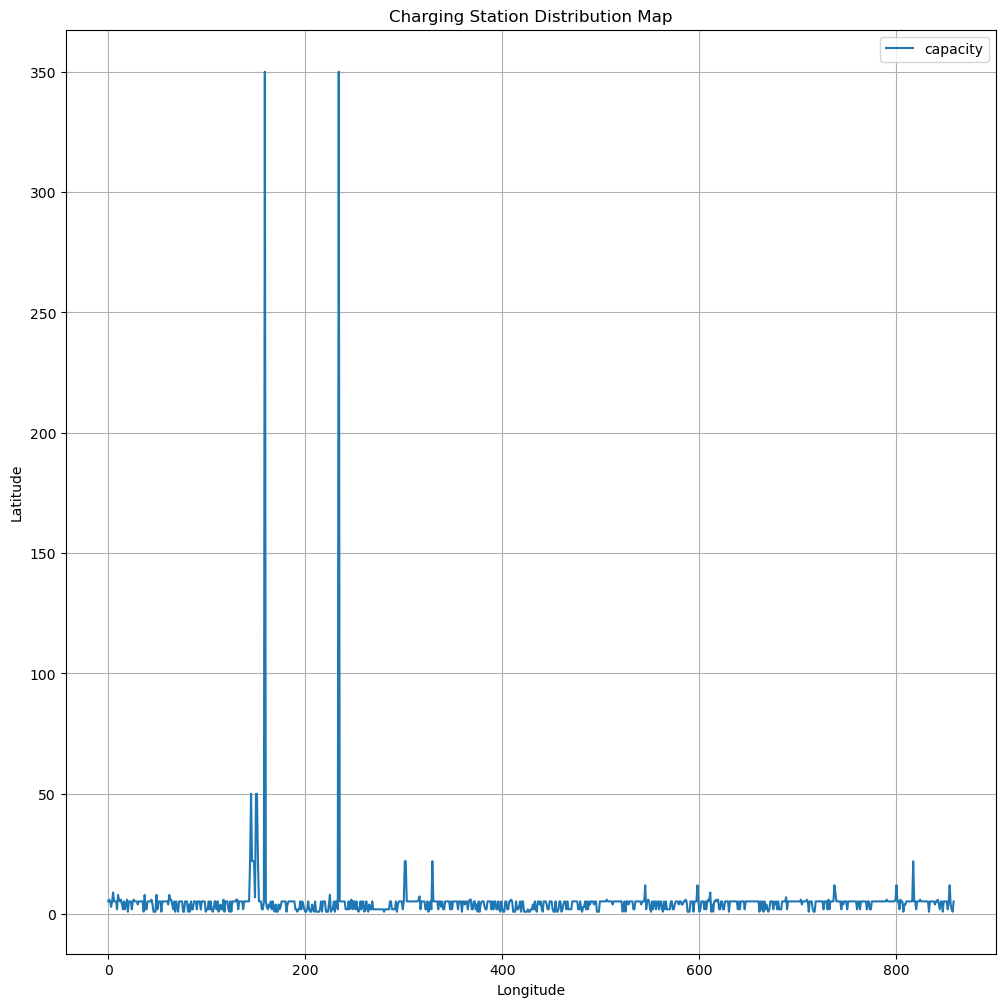

In [30]:
# Plot the charging station distribution map
fig, ax = plt.subplots(figsize=(12, 12))
charging_stations_df.plot(ax=ax, markersize=10, column='socket_type', legend=True)
plt.title('Charging Station Distribution Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

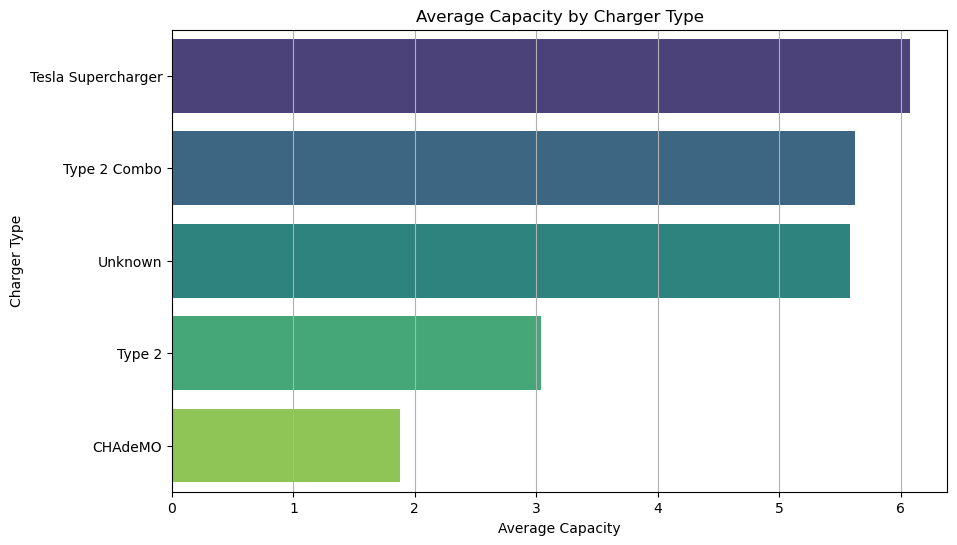

In [32]:
# Group by charger type and calculate the mean capacity
charger_capacity_mean = filtered_df.groupby('socket_type')['capacity'].mean().reset_index()

# Sort the DataFrame by mean capacity
charger_capacity_mean_sorted = charger_capacity_mean.sort_values(by='capacity', ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=charger_capacity_mean_sorted, x='capacity', y='socket_type', palette='viridis')
plt.xlabel('Average Capacity')
plt.ylabel('Charger Type')
plt.title('Average Capacity by Charger Type')
plt.grid(axis='x')
plt.show()